In [34]:
import os
import oseti
from nltk.sentiment import SentimentIntensityAnalyzer
import statistics
from tqdm import tqdm
import pandas as pd

In [3]:
sia = SentimentIntensityAnalyzer()
analyzer = oseti.Analyzer()

The collection consists of 42 authors, among which 32 are males and 10 females. <br>
<br>
Male authors:<br>
Abe Kazue<br>
Fujimoto Hitoshi<br>
Fumizawa Ryuichi<br>
Hara Tamiki<br>
Hashioka Takeshi<br>
Hosoda Tamiki<br>
Hotta Yoshie<br>
Iida Momo<br>
Ikuguchi Juro<br>
Inoue Mitsuhara<br>
Ishida Koji<br>
Iwasaki Seiichiro<br>
Kajiyama Tohiyuki<br>
Kamezawa Miyuki<br>
Kanai Toshihiro<br>
Katsura Yoshihisa<br>
Kawakami Sokun<br>
Kokubo Hitoshi<br>
Kurita Tohei<br>
Kyo Kusao<br>
Nakai Masafumi<br>
Nakayama Shiro<br>
Nakazato Kisho<br>
Natsubori Masamoto<br>
Nishihara Kei<br>
Ochi Michio<br>
Oda Katsuzo<br>
Oda Makoto<br>
Oe Kenzaburo<br>
Saiki Hisao<br>
Takeda Taijun<br>
Tsukuda Jitsuo<br>
<br>
Female authors:<br>
<br>
Ariyoshi Sawako<br>
Hayashi Kyoko<br>
Hironaka Toshio<br>
Inada Mihoko<br>
Kora Chihoko<br>
Mikawa Kiyo<br>
Nakamoto Takako<br>
Ota Yoko<br>
Sata Ineko<br>
Takenishi Hiroko<br>

In [30]:
authors = os.listdir("preprocessed_texts")
male = []
female = []
male_folders = []
female_folders = []
for author in authors:
    data = author.split(" - ")
    if data[1] == "M":
        male.append(data[0])
        male_folders.append(author)
    elif data[1] == "F":
        female.append(data[0])
        female_folders.append(author)

In [13]:
male

['Abe Kazue',
 'Fujimoto Hitoshi',
 'Fumizawa Ryuichi',
 'Hara Tamiki',
 'Hashioka Takeshi',
 'Hosoda Tamiki',
 'Hotta Yoshie',
 'Iida Momo',
 'Ikuguchi Juro',
 'Inoue Mitsuhara',
 'Ishida Koji',
 'Iwasaki Seiichiro',
 'Kajiyama Tohiyuki',
 'Kamezawa Miyuki',
 'Kanai Toshihiro',
 'Katsura Yoshihisa',
 'Kawakami Sokun',
 'Kokubo Hitoshi',
 'Kurita Tohei',
 'Kyo Kusao',
 'Nakai Masafumi',
 'Nakayama Shiro',
 'Nakazato Kisho',
 'Natsubori Masamoto',
 'Nishihara Kei',
 'Ochi Michio',
 'Oda Katsuzo',
 'Oda Makoto',
 'Oe Kenzaburo',
 'Saiki Hisao',
 'Takeda Taijun',
 'Tsukuda Jitsuo']

In [14]:
female

['Ariyoshi Sawako',
 'Hayashi Kyoko',
 'Hironaka Toshio',
 'Inada Mihoko',
 'Kora Chihoko',
 'Mikawa Kiyo',
 'Nakamoto Takako',
 'Ota Yoko',
 'Sata Ineko',
 'Takenishi Hiroko']

In [17]:
str([1.0, 2.9])

'[1.0, 2.9]'

Sentiment analysis of the pieces

In [20]:
def analyze_piece(input_text:str):
    """employs sentiment analysis of the input text,
    returns list of sa score for every sentence, mean value of all sentiment scores,
    and mean value with dropped zero scores"""
    sa_results = analyzer.analyze(input_text)
    non_zero_score = [score for score in sa_results if score != 0]
    return sa_results, statistics.mean(sa_results), statistics.mean(non_zero_score)

In [28]:
folders = os.listdir("preprocessed_texts") #overall sentiment
for folder in tqdm(folders):
    files = os.listdir(f"preprocessed_texts\\{folder}")
    for doc in files:
        with open(f"preprocessed_texts\\{folder}\\{doc}", encoding="utf-8") as file:
            text = file.read()
        results = analyze_piece(text)
        text = str(results[0])
        output_data = text[1:-1]
        with open(f"data\\SA scores\\{doc}", mode="w", encoding="utf-8") as file:
            file.write(output_data)

100%|██████████| 42/42 [27:37<00:00, 39.45s/it]   


In [29]:
folders = os.listdir("author's speech") # authors speech sentiment
for folder in tqdm(folders):
    files = os.listdir(f"author's speech\\{folder}")
    for doc in files:
        with open(f"author's speech\\{folder}\\{doc}", encoding="utf-8") as file:
            text = file.read()
        results = analyze_piece(text)
        text = str(results[0])
        output_data = text[1:-1]
        with open(f"data\\SA scores author's speech\\{doc}", mode="w", encoding="utf-8") as file:
            file.write(output_data)

100%|██████████| 42/42 [19:08<00:00, 27.34s/it] 


In [78]:
folders = os.listdir("direct speech") # direct speech sentiment
for folder in tqdm(folders):
    files = os.listdir(f"direct speech\\{folder}")
    for doc in files:
        with open(f"direct speech\\{folder}\\{doc}", encoding="utf-8") as file:
            text = file.read()
        results = analyze_piece(text)
        text = str(results[0])
        output_data = text[1:-1]
        with open(f"data\\SA scores direct speech\\{doc}", mode="w", encoding="utf-8") as file:
            file.write(output_data)

100%|██████████| 42/42 [01:52<00:00,  2.68s/it]


In [67]:
lengthes = {}
folders = os.listdir("texts")
male_works = []
female_works = []
for folder in folders:
    subfolders = os.listdir(f"texts\\{folder}")
    if folder in male_folders:
        male_works += subfolders
    elif folder in female_folders:
        female_works += subfolders
    for subfolder in subfolders:
        with open(f"texts\\{folder}\\{subfolder}", encoding="utf-8") as file:
            text = file.read()
        lengthes[subfolder] = len(text)

In [59]:
#male_works

In [44]:
len(male_works)

76

In [45]:
len(female_works)

41

In [90]:
female_works


['有吉 佐和子 - 祈禱.txt',
 '林 京子 - ギヤマン ビードロ.txt',
 '林 京子 - 二人の墓標.txt',
 '林 京子 - 同期会.txt',
 '林 京子 - 昭和二十年の夏.txt',
 '林 京子 - 曇り日の行進.txt',
 '林 京子 - 無きが如き.txt',
 '林 京子 - 祭りの場.txt',
 '林 京子 - 道.txt',
 '廣中 俊雄 - 炎の日.txt',
 '稲田 美穂子 - 見知られぬ旅.txt',
 '古浦 千穂子 - 風化の底.txt',
 '美川 きよ - あの日のこと.txt',
 '中本 たか子 - 死の鞭と光.txt',
 '大田 洋子 - たましいの後遺症.txt',
 '大田 洋子 - ほたる 「H市歴訪」のうち.txt',
 '大田 洋子 - わが小説『山上』.txt',
 '大田 洋子 - ヒ力ドンはごめんだ!.txt',
 '大田 洋子 - 創作態度.txt',
 '大田 洋子 - 原子爆弾.txt',
 '大田 洋子 - 原爆詩人の死.txt',
 '大田 洋子 - 受診証がふしぎでならない.txt',
 '大田 洋子 - 屍の街 序(冬芽書房版).txt',
 '大田 洋子 - 屍の街.txt',
 '大田 洋子 - 広島から来た娘たち.txt',
 '大田 洋子 - 広島の木の皮.txt',
 '大田 洋子 - 恋.txt',
 '大田 洋子 - 愛するふるさと.txt',
 '大田 洋子 - 暴露の時間.txt',
 '大田 洋子 - 死の魔手.txt',
 '大田 洋子 - 病葉.txt',
 '大田 洋子 - 私は忘れたい広島の思い出を.txt',
 '大田 洋子 - 蠣転の旅.txt',
 '大田 洋子 - 血のなかに死の灰が流れる.txt',
 '田 洋子 - 私と「原爆症」とについて.txt',
 '佐多 稲子 - 今日になっての話.txt',
 '佐多 稲子 - 樹影.txt',
 '佐多 稲子 - 歴訪.txt',
 '佐多 稲子 - 色のない画.txt',
 '竹西 寛子 - 儀式.txt',
 '竹西 寛子 - 管絃祭.txt']

In [69]:
all_works_raw = female_works + male_works
all_works = [item[:-4] for item in all_works_raw]
ordered_lengthes = [lengthes[item] for item in all_works_raw]

In [104]:
all_data = pd.DataFrame(columns=["Title", "Length in characters", "Overall Sentiment", "Direct Speech Sentiment", "Author's Speech Sentiment",
                                  "Difference Value"])

In [73]:
docs = os.listdir("data\\SA scores") #extract numbers of overall sentiment for dataframe
ordered_overall_sent = []
for item in all_works_raw:
    with open (f"data\\SA scores\\{item}", encoding="utf-8") as file:
        file_data = file.read()
    file_data = file_data.split(', ')
    file_data = [float(item) for item in file_data]
    ordered_overall_sent.append(statistics.mean(file_data))
    




In [79]:
 #extract numbers of direct speech sentiment for dataframe
ordered_ds_sent = []
for item in all_works_raw:
    with open (f"data\\SA scores direct speech\\{item}", encoding="utf-8") as file:
        file_data = file.read()
    file_data = file_data.split(', ')
    file_data = [float(item) for item in file_data]
    ordered_ds_sent.append(statistics.mean(file_data))

In [83]:
 #extract numbers of author's speech sentiment for dataframe
ordered_aus_sent = []
for item in all_works_raw:
    with open (f"data\\SA scores author's speech\\{item}", encoding="utf-8") as file:
        file_data = file.read()
    file_data = file_data.split(', ')
    file_data = [float(item) for item in file_data]
    ordered_aus_sent.append(statistics.mean(file_data))

In [86]:
more_intensive = []
for i in range(len(ordered_ds_sent)):
    if ordered_ds_sent[i] > ordered_aus_sent[i]:
        more_intensive.append("Yes")
    else:
        more_intensive.append("No")

In [105]:
all_data["Title"] = all_works
all_data["Length in characters"] = ordered_lengthes
all_data["Overall Sentiment"] = ordered_overall_sent
all_data["Direct Speech Sentiment"] = ordered_ds_sent
all_data["Author's Speech Sentiment"] = ordered_aus_sent
all_data["Difference Value"] = all_data["Direct Speech Sentiment"] - all_data["Author's Speech Sentiment"]
#all_data["More intensive?"] = more_intensive
all_data

,Title,Length in characters,Overall Sentiment,Direct Speech Sentiment,Author's Speech Sentiment,Difference Value
0,有吉 佐和子 - 祈禱,30102,0.007671,0.065030,-0.035530,0.100560
1,林 京子 - ギヤマン ビードロ,112867,-0.011454,-0.054455,-0.010385,-0.044071
2,林 京子 - 二人の墓標,22251,-0.110104,-0.139089,-0.098741,-0.040348
3,林 京子 - 同期会,16390,0.016105,0.142857,0.017386,0.125471
4,林 京子 - 昭和二十年の夏,18826,-0.013255,0.500000,-0.015090,0.515090
...,...,...,...,...,...,...
112,大江 健三郎 - ヒロシマ・ノ—卜 7,10756,-0.119351,-0.257576,-0.111784,-0.145792
113,大江 健三郎 - 核状況のカナリア理論,16313,0.006504,-0.204678,0.023987,-0.228665
114,斎木寿夫 - 死者は裁かない,17833,-0.130481,-0.121918,-0.128818,0.006900
115,武田 泰淳 - 第一のボタン,78975,0.004374,0.045368,-0.023118,0.068487


In [89]:
all_data.to_excel("data\\results.xlsx")

In [92]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [111]:
numeric_data = all_data.iloc[:, 1:]

In [112]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)


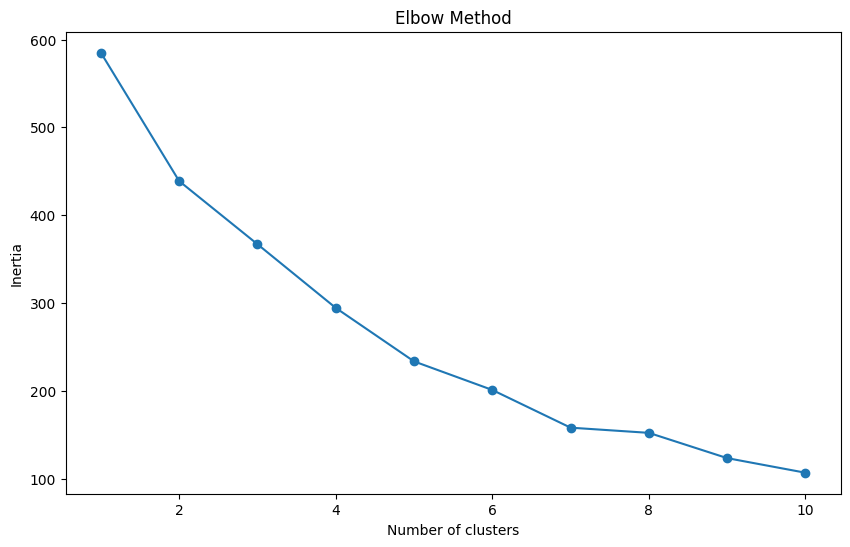

In [113]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [116]:
# Replace '3' with your chosen number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_data)


KMeans(n_clusters=5, random_state=42)

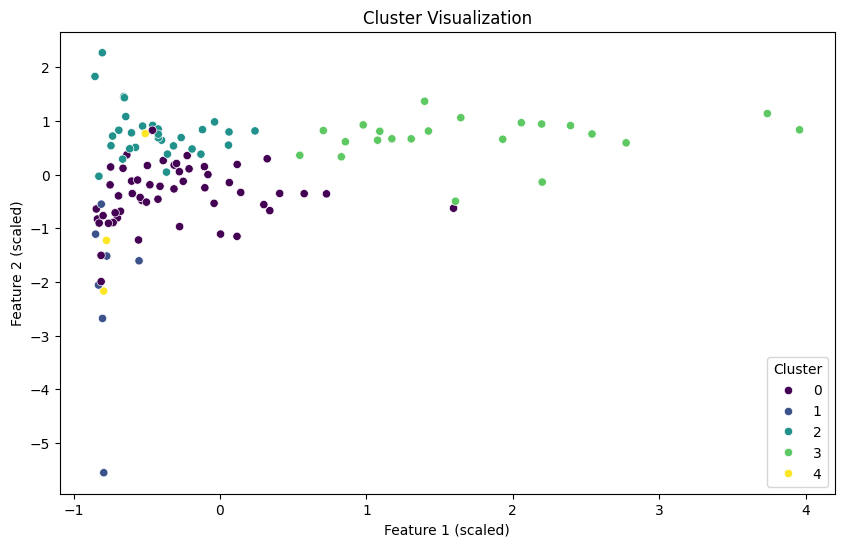

In [117]:
# For simplicity, let's assume you can use the first two dimensions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=kmeans.labels_, palette='viridis')
plt.title('Cluster Visualization')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend(title='Cluster')
plt.show()
